## Interpretations of coefficients in non-linear models  

### Logarithmic and semi-logarithmic models

- $y_i = \beta_1 + \beta_2* x_i+ u_i$
    - $\dfrac{dy_i}{dx_i} = \beta_2$
    - x increases by 1 => y increases by $\beta$ 
- $log(y_i) = \beta_1 + \beta_2* log(x_i) + u_i$
    - $\dfrac{d \ln y_i}{d \ln x_i} = \dfrac{100 * d y_i / y_i}{100 * d  x_i / x_i}  = \beta_2$
    - x increases by 1% => y increases by $\beta$ %
- $y_i = \beta_1 + \beta_2* log(x_i) + u_i$
    - $\dfrac{d y_i}{d \ln x_i} = \beta_2$
    - $\dfrac{d y_i }{100 *  d  x_i / x_i} = \beta_2 / 100 $
    - x increases by 1% => y increases by $\beta/100$ 
- $log(y_i) = \beta_1 + \beta_2* x_i + u_i$
    - $\dfrac{100 * d y_i / y_i}{d  x_i } = 100 * \beta_2$
    - x increases by 1 => y increases by $100 \beta$ % 


### Models with quadratic and interactive terms

Models with quadratic terms

$Y=\beta_{1}+\beta_{2} X_{2}+\beta_{3} X_{2}^{2}+\epsilon$

$\frac{\mathrm{d} Y}{\mathrm{d} X_{2}}=\beta_{2}+2 \beta_{3} X_{2}$

- What this shows is that $\beta_{2}$ gives the rate of change when $x$ is equal to zero. 
- It tells both the direction and steepness of the curvature (a positive value indicates the curvature is upwards while a negative value indicates the curvature is downwards).

$Y=\beta_{1}+\left(\beta_{2}+\beta_{3} X_{2}\right) X_{2}+u$

- The coefficient $\beta_{3}$ tells a rate of change of $X_{2}$ per unit change of $X_{2}$. 

In [ ]:
df <- mtcars
head(df)
?mtcars

In [ ]:
## possibly more meaningful, e.g., for summary() or bivariate plots:
mtcars2 <- within(mtcars, {
   vs <- factor(vs, labels = c("V", "S"))
   am <- factor(am, labels = c("automatic", "manual"))
   cyl  <- ordered(cyl)
   gear <- ordered(gear)
   carb <- ordered(carb)
})
summary(mtcars2)

In [95]:
df <- df[,-(8:9)]

In [ ]:
require(graphics)
pairs(df, main = "mtcars data", gap = 1/4)

In [ ]:
library(psych)
pairs.panels(df, lm=T, ellipses=F, method = 'pearson', breaks="Sturges")
pairs.panels(df, lm=T, ellipses=F, method = 'spearman', breaks="FD")

In [ ]:
# about dummies
# coplot(mpg ~ disp | as.factor(cyl), data = df, panel = panel.smooth, rows = 1)
# coplot(mpg ~ disp | as.factor(gear), data = df, panel = panel.smooth, rows = 1)
# coplot(mpg ~ disp | as.factor(carb), data = df, panel = panel.smooth, rows = 1)

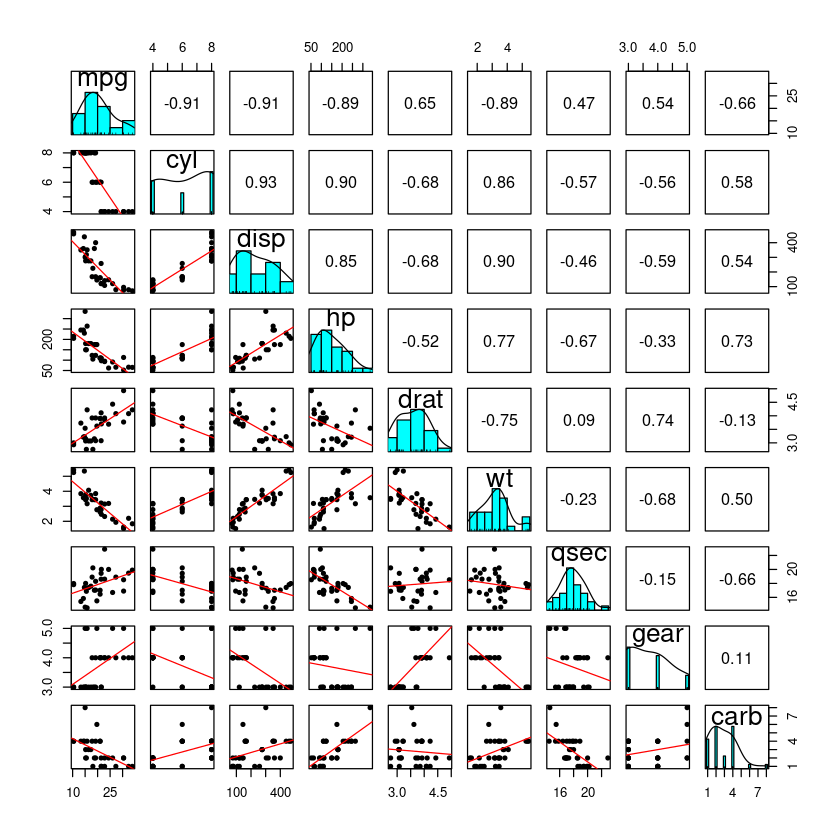

In [104]:
pairs.panels(df, lm=T, ellipses=F, method = 'spearman', breaks="FD")

In [117]:
lm1 <- lm(mpg~disp, data = df)
summary(lm1)


Call:
lm(formula = mpg ~ disp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
disp        -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


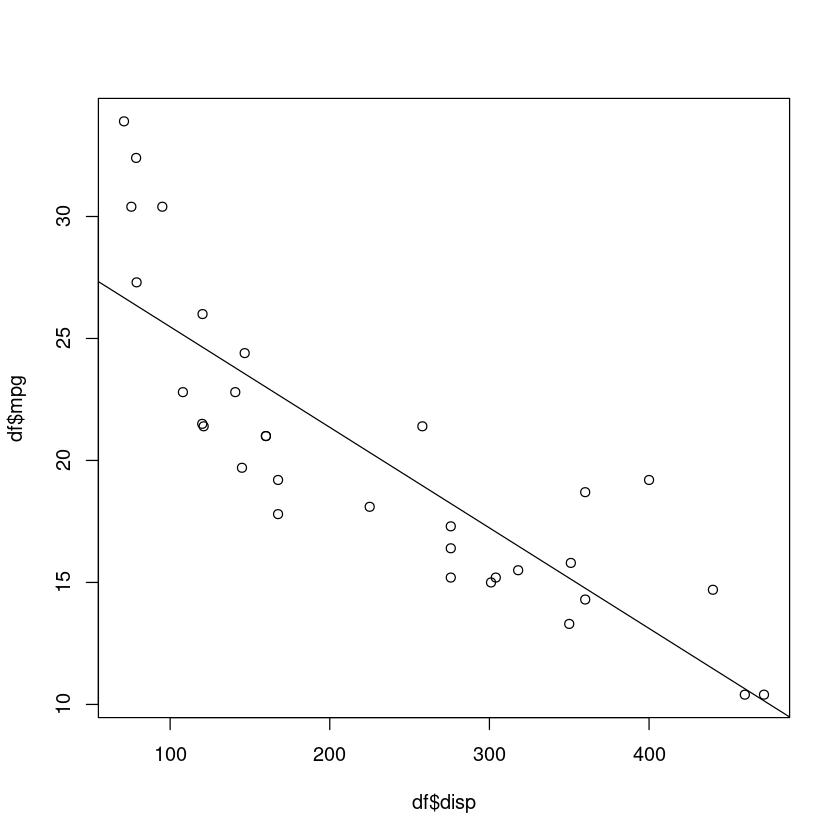

In [118]:
plot(df$disp,df$mpg)
abline(lm1)

In [139]:
df['disp2'] <- df['disp']^2 
lm2 <- lm(mpg~disp+disp2, data = df)
summary(lm2)


Call:
lm(formula = mpg ~ disp + disp2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
disp2        1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10


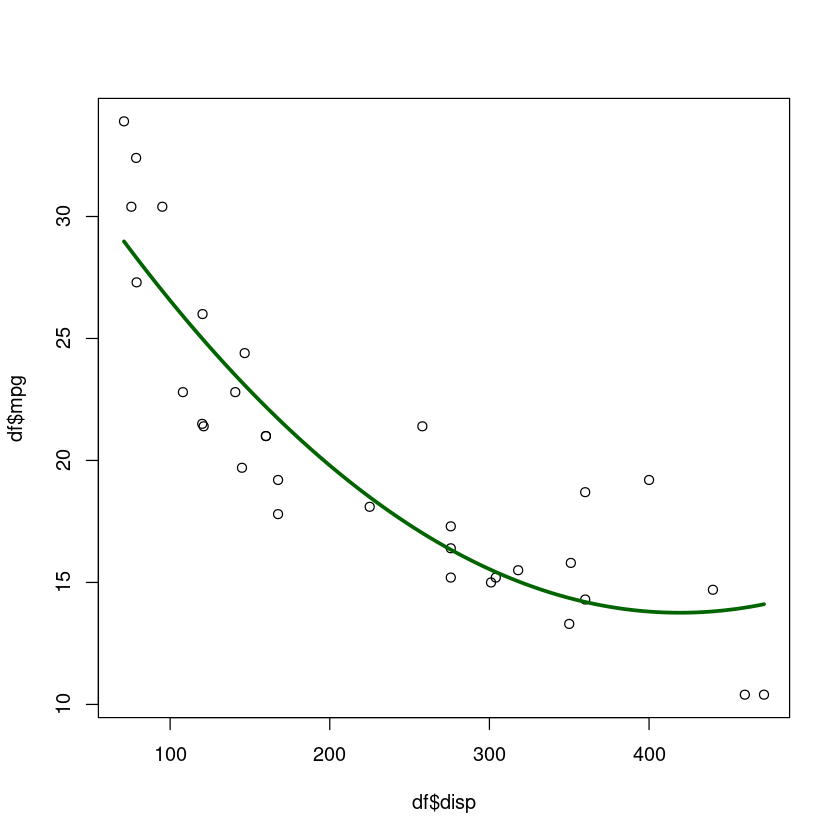

In [130]:
plot(df$disp,df$mpg)
disp_p <- seq(min(df$disp), max(df$disp), 0.1)
predict_p <- predict(lm2,list(disp=disp_p, disp2=disp_p^2))
lines(disp_p, predict_p,  col = "darkgreen", lwd = 3)

We have already seen that the estimate of the
intercept may have no sensible meaning if $X_2 = 0$ is outside the data range.

So the trick is to place the zero value within the range of our data. We will do this by centering the $x$, that is, we will subtract the mean of $x$ from each value. 
You note that the coefficient for the quadratic term are unchanged while the coefficient for the linear better reflect the linear relation.

In [133]:
df['dispc'] <- df['disp'] - mean(df['disp'],na.rm = T) 

Warning message in mean.default(df["disp"], na.rm = T):
“argument is not numeric or logical: returning NA”

In [135]:
mean(df[['disp']],na.rm = T) 

[1] 230.7219

In [142]:
df['dispc'] <- df['disp'] - mean(df[['disp']]) 
df['dispc2'] <- df['dispc']^2
lm3 <- lm(mpg~dispc+dispc2, data = df)
summary(lm3)
summary(lm2)


Call:
lm(formula = mpg ~ dispc + dispc2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.822e+01  7.660e-01  23.788  < 2e-16 ***
dispc       -4.734e-02  4.529e-03 -10.454 2.39e-11 ***
dispc2       1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10



Call:
lm(formula = mpg ~ disp + disp2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
disp2        1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10


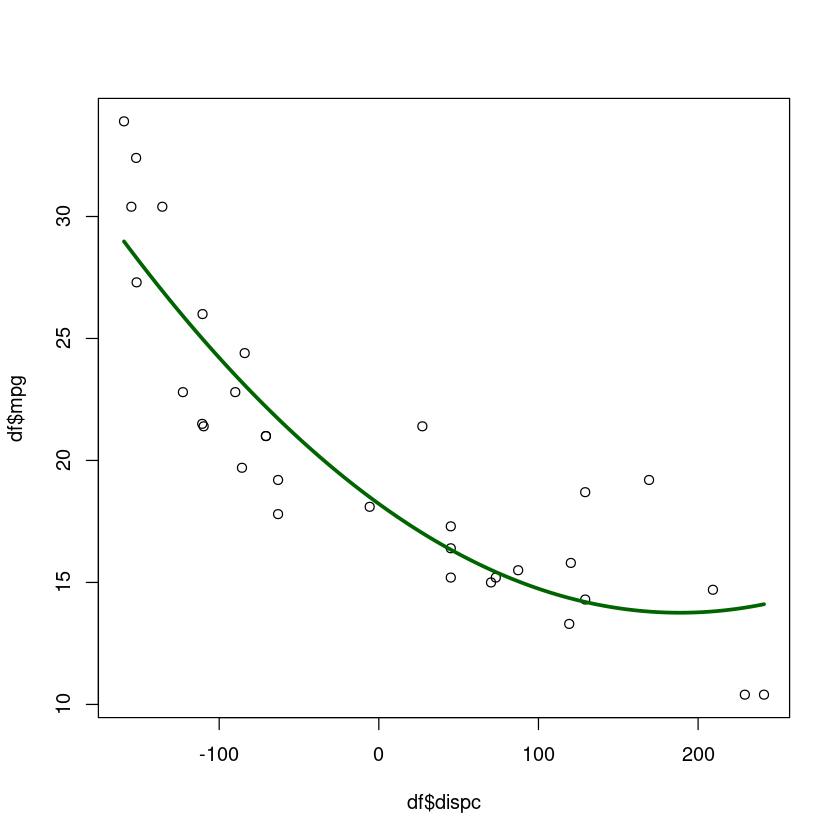

In [146]:
plot(df$dispc,df$mpg)
dispc_p <- seq(min(df$dispc), max(df$dispc), 0.1)
predict_p <- predict(lm3,list(dispc=dispc_p, dispc2=dispc_p^2))
lines(disp_p, predict_p,  col = "darkgreen", lwd = 3)

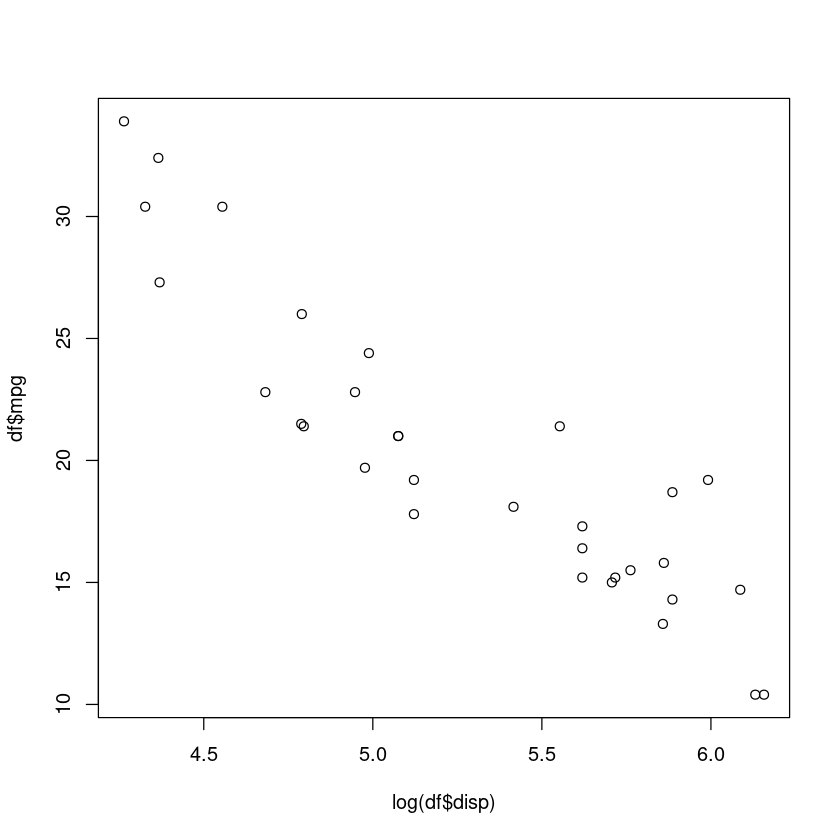

In [147]:
plot(log(df$disp),df$mpg)

In [152]:
lm4 <- lm(mpg~log(disp), data = df)
summary(lm4)


Call:
lm(formula = mpg ~ log(disp), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8078 -1.6337 -0.6748  1.4429  5.6764 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.2050     4.1855   16.54  < 2e-16 ***
log(disp)    -9.2935     0.7873  -11.80  8.4e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.579 on 30 degrees of freedom
Multiple R-squared:  0.8229,	Adjusted R-squared:  0.8169 
F-statistic: 139.3 on 1 and 30 DF,  p-value: 8.4e-13


In [105]:
?mtcars

Models with interactive terms

$Y=\beta_{1}+\beta_{2} X_{2}+\beta_{3} X_{3}+\beta_{4} X_{2} X_{3}+u$

$Y=\beta_{1}+\left(\beta_{2}+\beta_{4} X_{3}\right) X_{2}+\beta_{3} X_{3}+u$

This representation makes explicit the fact that $(\beta_2 + \beta_4 X_3 )$, the marginal effect of $X_2$ on $Y$, depends on the value of $X_3$, From this it can be seen that the interpretation of $\beta_2 $ has a special interpretation. It gives the marginal effect of $X_2$ on $Y$, when $X_3 = 0$.

If $X_3 = 0$ is a long way outside the range of $X_3$ in the sample, the interpretation of the estimate of $\beta_2 $ as an estimate of the marginal effect of $X_2$ when $X_3 = 0$
should be treated with caution. Sometimes the estimate will be completely
implausible, in the same way as the estimate of the intercept in a regression
is often implausible if given a literal interpretation.

##  RESET test


Ramsey RESET (Regression Equation Specification Error Test) for functional misspecification

More specifically, it tests whether non-linear combinations of the fitted values help explain the response variable.

The intuition behind the test is that if non-linear combinations of the explanatory variables have any power in explaining the response variable, the model is misspecified in the sense that the data generating process might be better approximated by a polynomial or another non-linear functional form. 

$
H_{0}: y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\varepsilon_{i}
$

$H_a:$ model is misspecified

- Step 1: estimate $y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\varepsilon_{i}$
- Step 2: calculate fitted $\hat{y}$
- Step 3: test then tests whether any of $\hat{y}^2$, ... ,$\hat{y}^k$  has any power in explaining y:  
$$y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\gamma_{1} \hat{y}_{i}^{2}+\gamma_{2} \hat{y}_{i}^{3}+\ldots+\gamma_{p} \hat{y}_{i}^{p+1}+\varepsilon_{i}$$
- Step 4: F-test whether $ \gamma_{1} = ... = \gamma_{k-1} = 0$. If the null-hypothesis that all $ \gamma$ coefficients are zero is rejected, then the model suffers from misspecification. 

F-test:

Asymptotically

$\chi^{2}=\frac{R S S_{R}-R S S_{U R}}{R S S_{U R} /\left(n-k_{U R}\right)} \rightarrow \chi_{r}^{2}$


Under normality of error term $\varepsilon_{i} \mid X \sim N\left(0, \sigma^{2}\right)$

$F=\frac{\left(R S S_{R}-R S S_{U R}\right) / r}{R S S_{U R} /\left(n-k_{U R}\right)} \sim F_{r, n-k_{U R}}$

r - number of restricting equations

> If $X\sim F(d_{1},d_{2})$ then $ Y=\lim _{d_{2}\to \infty }d_{1}X $  has the chi-squared distribution $\chi _{d_{1}}^{2}$



In [81]:
library(lmtest)
x <- c(1:30)
y1 <- 1 + x + x^2 + rnorm(30)
y2 <- 1 + x + rnorm(30)

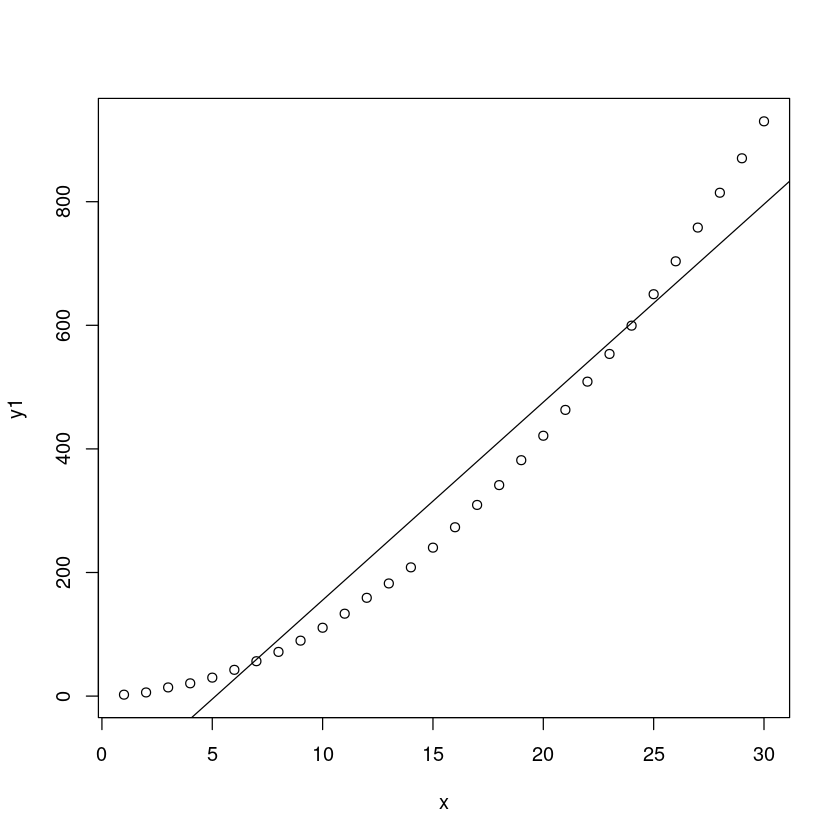

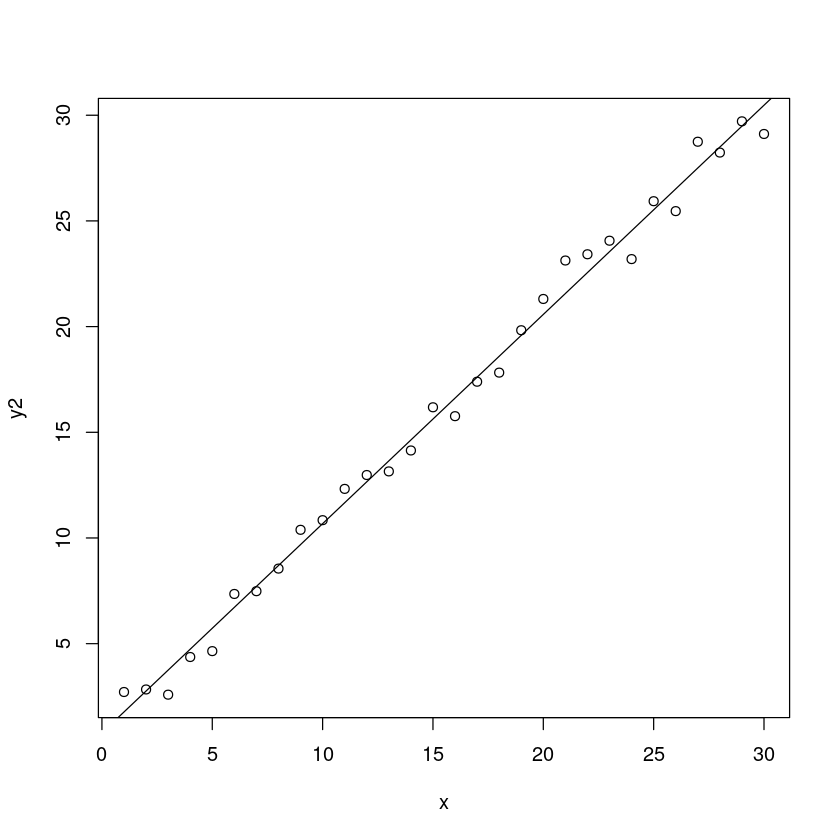

In [82]:
plot(x,y1)
abline(lm(y1~x))
plot(x,y2)
abline(lm(y2~x))

In [96]:
resettest(y1 ~ x, power=2, type="regressor")
resettest(y2 ~ x, power=2, type="regressor")


	RESET test

data:  y1 ~ x
RESET = 93248, df1 = 1, df2 = 27, p-value < 2.2e-16



	RESET test

data:  y2 ~ x
RESET = 0.60958, df1 = 1, df2 = 27, p-value = 0.4417


In [97]:
resettest(y1 ~ x, power=2, type="fitted")
resettest(y2 ~ x, power=2, type="fitted")


	RESET test

data:  y1 ~ x
RESET = 93248, df1 = 1, df2 = 27, p-value < 2.2e-16



	RESET test

data:  y2 ~ x
RESET = 0.60958, df1 = 1, df2 = 27, p-value = 0.4417


In [98]:
summary(lm(y1~x+x2))
x2 <- x^2
summary(lm(y2~x+x2))


Call:
lm(formula = y1 ~ x + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57955 -0.79477 -0.00946  0.55140  2.33105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.144779   0.702684   0.206    0.838    
x           1.071438   0.104491  10.254 8.27e-11 ***
x2          0.998717   0.003271 305.366  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.198 on 27 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 8.495e+05 on 2 and 27 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3462 -0.6208  0.1112  0.5423  1.4844 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.495898   0.471978   1.051    0.303    
x            1.043013   0.070184  14.861 1.61e-14 ***
x2          -0.001715   0.002197  -0.781    0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8049 on 27 degrees of freedom
Multiple R-squared:  0.9921,	Adjusted R-squared:  0.9915 
F-statistic:  1700 on 2 and 27 DF,  p-value: < 2.2e-16


In [83]:
resettest(y1 ~ x, power=2, type="fitted")
resettest(y2 ~ x, power=2, type="fitted")


	RESET test

data:  y1 ~ x
RESET = 93248, df1 = 1, df2 = 27, p-value < 2.2e-16



	RESET test

data:  y2 ~ x
RESET = 0.60958, df1 = 1, df2 = 27, p-value = 0.4417


In [86]:
?mtcars

In [99]:
lm1<-lm(mpg~.,data = df)
summary(lm1)


Call:
lm(formula = mpg ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0230 -1.6874 -0.4109  0.9640  5.4400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 17.88964   17.81996   1.004   0.3259  
cyl         -0.41460    0.95765  -0.433   0.6691  
disp         0.01293    0.01758   0.736   0.4694  
hp          -0.02085    0.02072  -1.006   0.3248  
drat         1.10110    1.59806   0.689   0.4977  
wt          -3.92065    1.86174  -2.106   0.0463 *
qsec         0.54146    0.62122   0.872   0.3924  
gear         1.23321    1.40238   0.879   0.3883  
carb        -0.25510    0.81563  -0.313   0.7573  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.622 on 23 degrees of freedom
Multiple R-squared:  0.8596,	Adjusted R-squared:  0.8107 
F-statistic:  17.6 on 8 and 23 DF,  p-value: 4.226e-08


In [101]:
resettest(lm1, power=2, type="regressor")
resettest(lm1, power=2, type="fitted")


	RESET test

data:  lm1
RESET = 1.3702, df1 = 8, df2 = 15, p-value = 0.285



	RESET test

data:  lm1
RESET = 12.369, df1 = 1, df2 = 22, p-value = 0.001944


##  Nonlinear LS

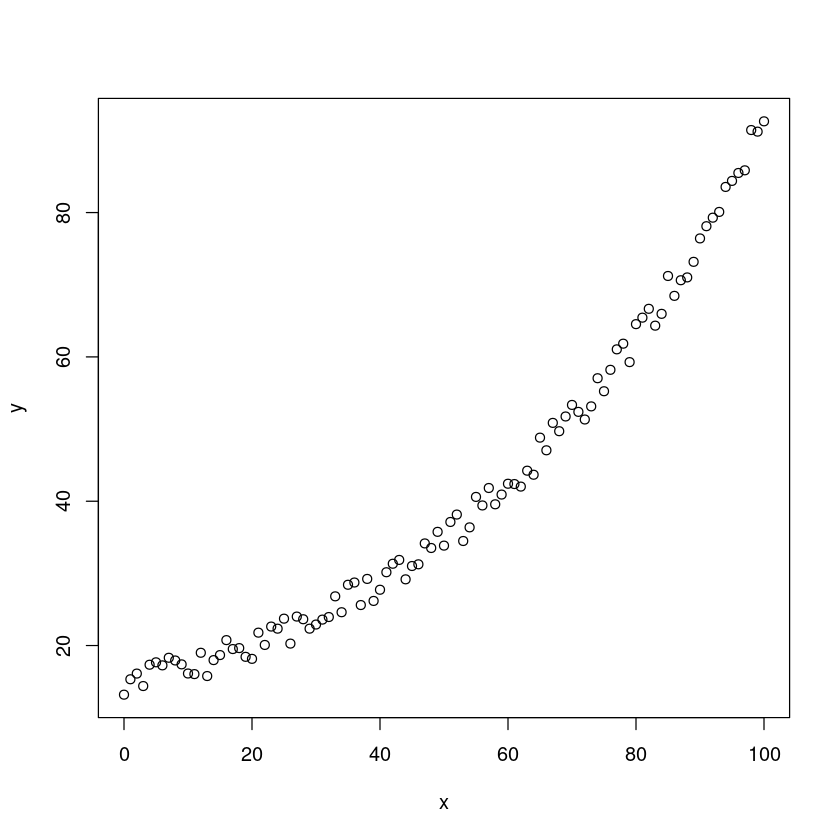

In [21]:
#set a seed value

set.seed(23)

#Generate x as 100 integers using seq function

x<-seq(0,100,1)

#Generate y as a*e^(bx)+c

y<-runif(1,0,20)*exp(runif(1,0.005,0.075)*x)+runif(101,0,5)

#How does our data look like? Lets plot it

plot(x,y)

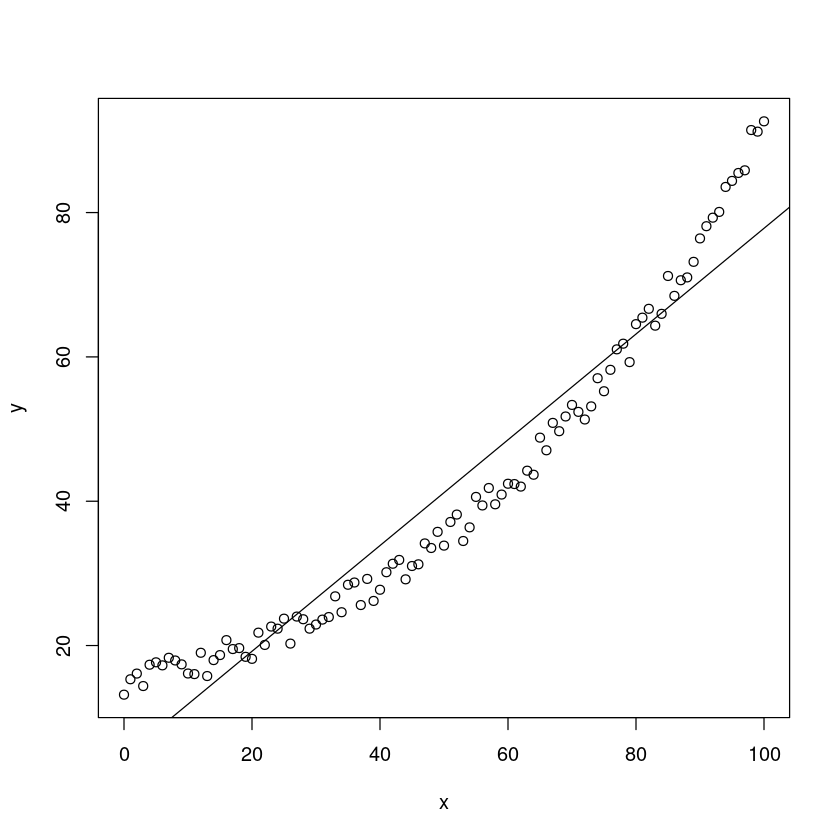

In [22]:
#Linear model

lin_mod=lm(y~x)

#Plotting the model

plot(x,y)

abline(lin_mod)

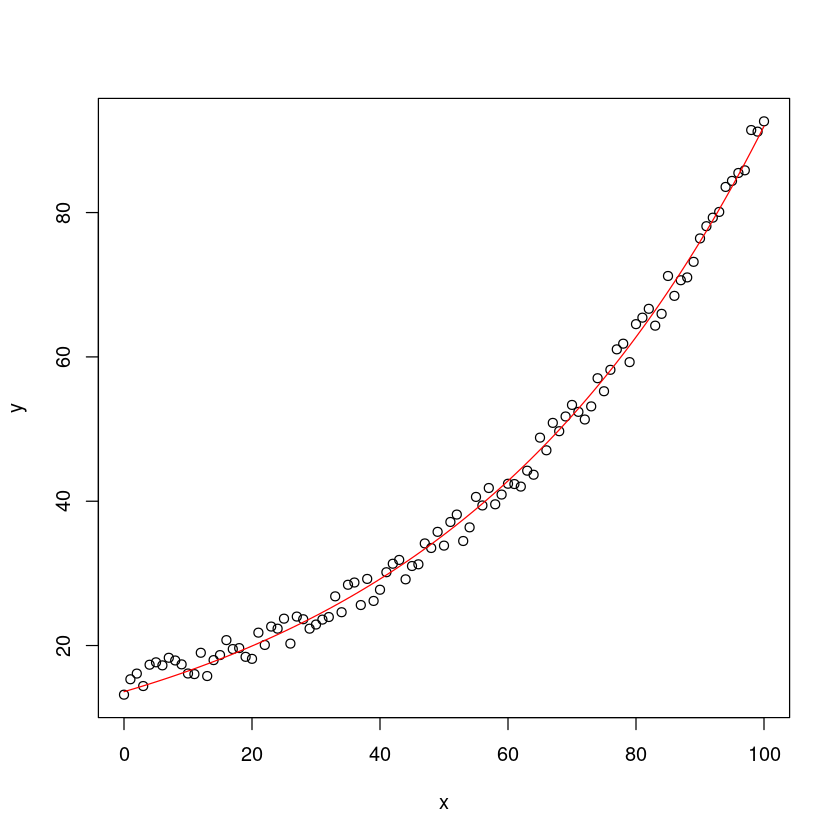

In [25]:
nonlin_mod=nls(y~a*exp(b*x),start=list(a=13,b=0.1)) #a is the starting value and b is the exponential start

#This new plot can be made by using the lines() function

plot(x,y)

lines(x,predict(nonlin_mod),col='red')

This is a much better fit and clearly passes through most of the data. For more clarity, we will now calculate the errors for both the models

In [26]:
#Error calculation

error <- lin_mod$residuals  

lm_error <- sqrt(mean(error^2))   #5.960544

error2=y-predict(nonlin_mod)

nlm_error <- sqrt(mean(error2^2)) #1.527064

In [3]:
#simulate some data
set.seed(20160227)
x<-seq(0,50,1)
y<-((runif(1,10,20)*x)/(runif(1,0,10)+x))+rnorm(51,0,1)
#for simple models nls find good starting values for the parameters even if it throw a warning
m<-nls(y~a*x/(b+x))
#get some estimation of goodness of fit
cor(y,predict(m))

Warning message in nls(y ~ a * x/(b + x)):
“No starting values specified for some parameters.
Initializing ‘a’, ‘b’ to '1.'.
Consider specifying 'start' or using a selfStart model”

[1] 0.9496598

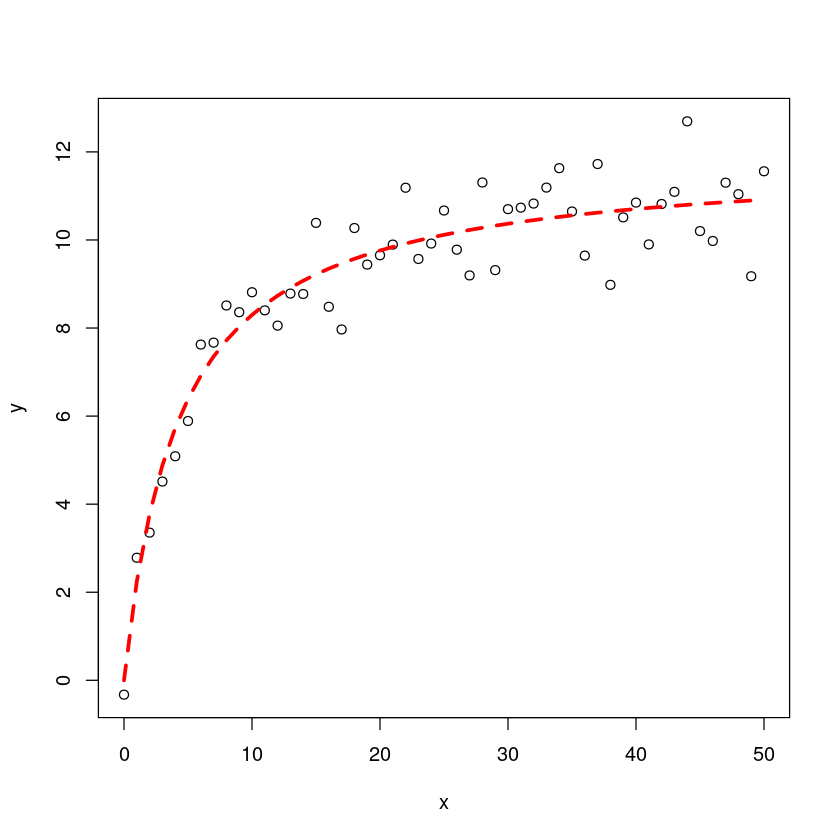

In [2]:
#plot
plot(x,y)
lines(x,predict(m),lty=2,col="red",lwd=3)

Finding good starting values is very important in non-linear regression to allow the model algorithm to converge. If you set starting parameters values completely outside of the range of potential parameter values the algorithm will either fail or it will return non-sensical parameter like for example returning a growth rate of 1000 when the actual value is 1.04.

The best way to find correct starting value is to “eyeball” the data, plotting them and based on the understanding that you have from the equation find approximate starting values for the parameters.

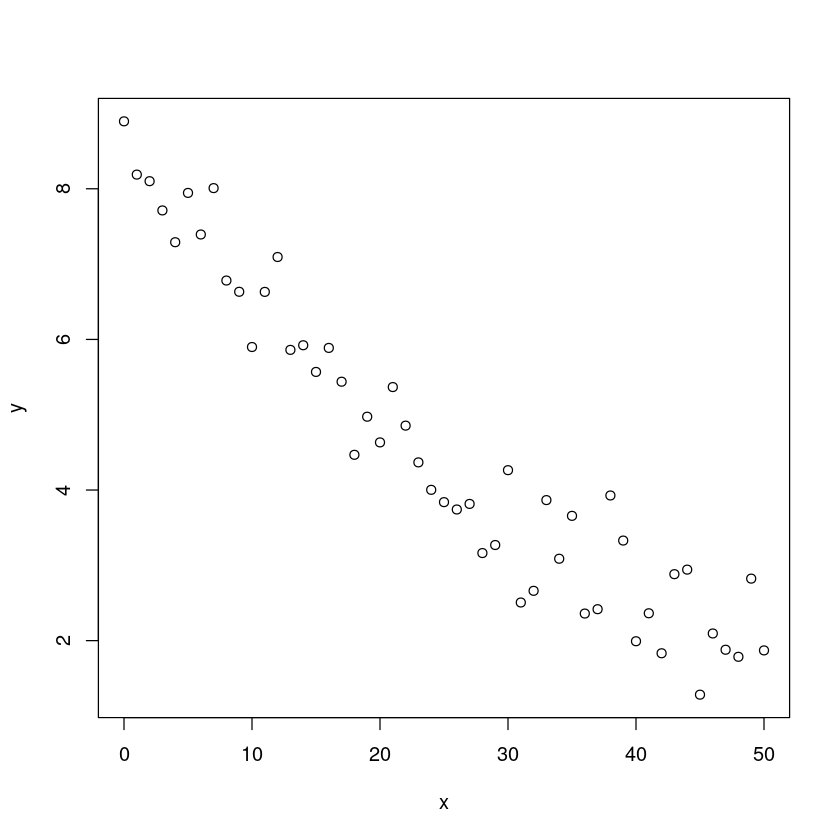

In [6]:
#simulate some data, this without a priori knowledge of the parameter value
y<-runif(1,5,15)*exp(-runif(1,0.01,0.05)*x)+rnorm(51,0,0.5)
#visually estimate some starting parameter values
plot(x,y)

In [7]:
#from this graph set approximate starting values
a_start<-8 #param a is the y value when x=0
b_start<-2*log(2)/a_start #b is the decay rate
#model
m<-nls(y~a*exp(-b*x),start=list(a=a_start,b=b_start))
#get some estimation of goodness of fit
cor(y,predict(m))

[1] 0.9695322

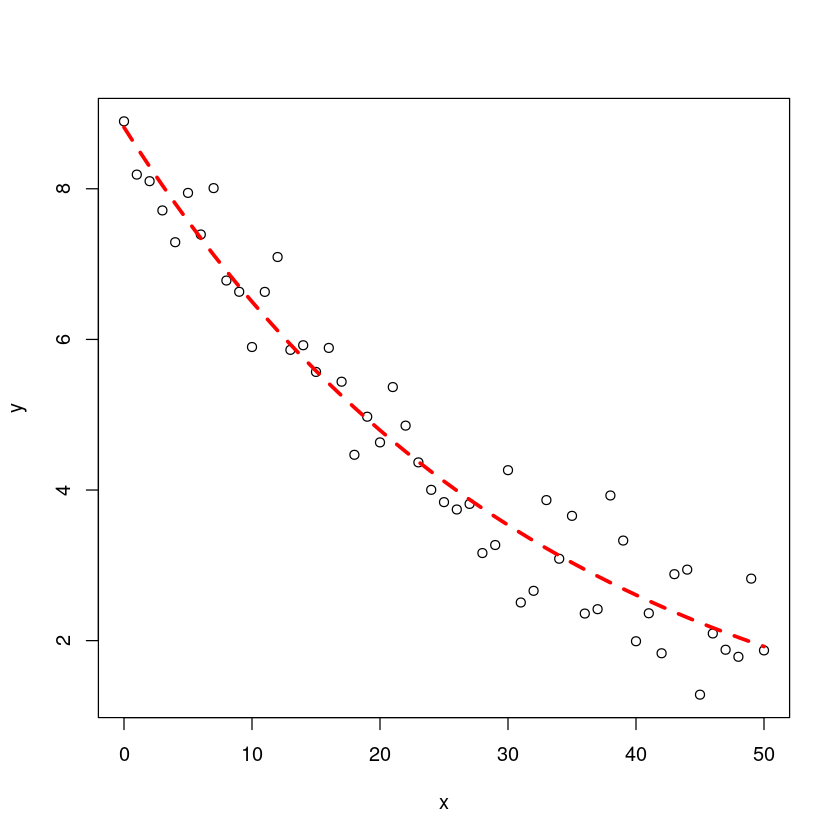

In [9]:
#plot the fit
plot(x,y)
lines(x,predict(m),col="red",lty=2,lwd=3)

It is very common for different scientific fields to use different parametrization (i.e. different equations) for the same model, one example is the logistic population growth model, in ecology we use the following form:
$$ N_{t} = \frac{K*N_{0}*e^{r*t}}{K + N_{0} * (e^{r*t} – 1)} $$
With $(N_{t})$ being the number of individuals at time $(t), (r)$ being the population growth rate and $(K)$ the carrying capacity. We can re-write this as a differential equation:
$$ dN/dt = R*N*(1-N/K) $$

In [13]:
install.packages('deSolve')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


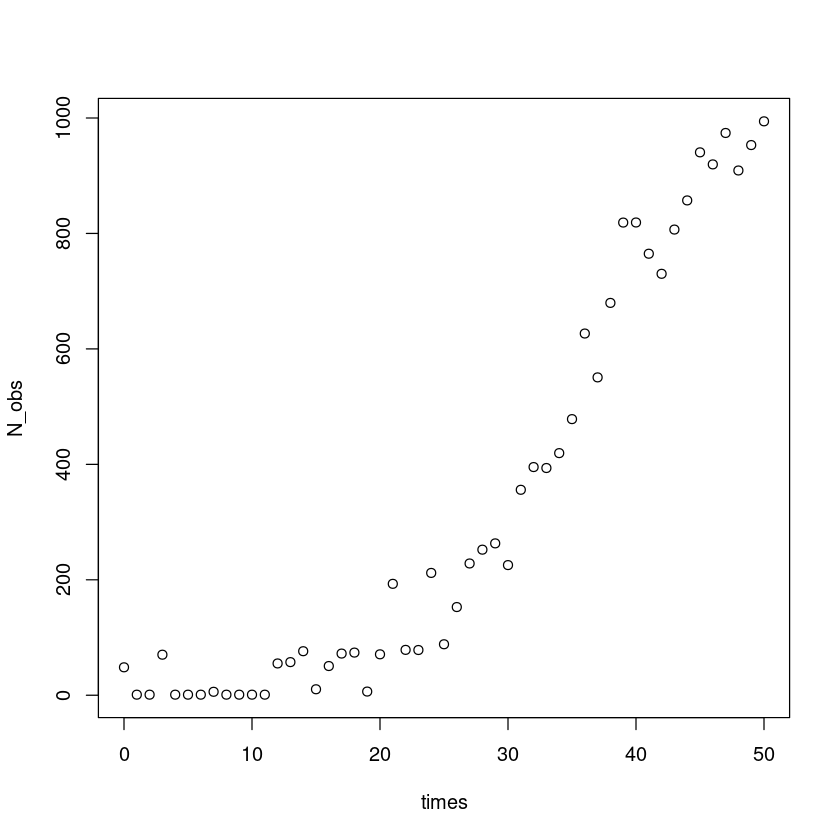

In [14]:
library(deSolve)
#simulating some population growth from the logistic equation and estimating the parameters using nls
log_growth <- function(Time, State, Pars) {
  with(as.list(c(State, Pars)), {
    dN <- R*N*(1-N/K)
    return(list(c(dN)))
  })
}
#the parameters for the logisitc growth
pars  <- c(R=0.2,K=1000)
#the initial numbers
N_ini  <- c(N=1)
#the time step to evaluate the ODE
times <- seq(0, 50, by = 1)
#the ODE
out   <- ode(N_ini, times, log_growth, pars)
#add some random variation to it
N_obs<-out[,2]+rnorm(51,0,50)
#numbers cannot go lower than 1
N_obs<-ifelse(N_obs<1,1,N_obs)
#plot
plot(times,N_obs)

This part was just to simulate some data with random error, now come the tricky part to estimate the starting values.
Now R has a built-in function to estimate starting values for the parameter of a logistic equation (SSlogis) but it uses the following equation:
$$ N_{t} = \frac{alpha}{1+e^{\frac{xmid-t}{scale}}} $$

In [15]:
#find the parameters for the equation
SS<-getInitial(N_obs~SSlogis(times,alpha,xmid,scale),data=data.frame(N_obs=N_obs,times=times))

In [16]:
SS

alpha        xmid       scale 
1059.938387   35.252541    5.726501

We use the function getInitial
which gives some initial guesses about the parameter values based on the data. We pass to this function a selfStarting model (SSlogis
) which takes as argument an input vector (the t values where the function will be evaluated), and the un-quoted name of the three parameter for the logistic equation.

However as the SSlogis
use a different parametrization we need to use a bit of algebra to go from the estimated self-starting values returned from SSlogis
to the one that are in the equation we want to use. 

In [18]:
#we used a different parametrization
K_start<-SS["alpha"]
R_start<-1/SS["scale"]
N0_start<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
#the formula for the model
log_formula<-formula(N_obs~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)))
#fit the model
m<-nls(log_formula,start=list(K=K_start,R=R_start,N0=N0_start))
#estimated parameters
summary(m)


Formula: N_obs ~ K * N0 * exp(R * times)/(K + N0 * (exp(R * times) - 1))

Parameters:
          Estimate Std. Error t value Pr(>|t|)    
K.alpha  1.060e+03  4.020e+01  26.364   <2e-16 ***
R.scale  1.746e-01  1.201e-02  14.545   <2e-16 ***
N0.alpha 2.243e+00  8.380e-01   2.677   0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.27 on 48 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.01e-06


In [19]:
#get some estimation of goodness of fit
cor(N_obs,predict(m))

[1] 0.9920826

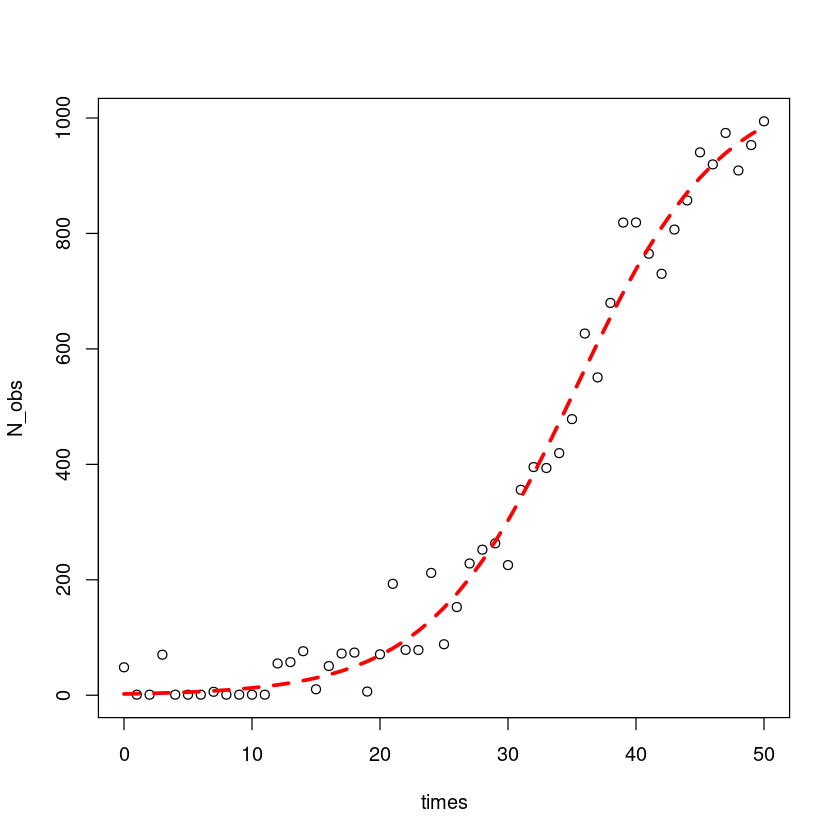

In [20]:
#plot
plot(times,N_obs)
lines(times,predict(m),col="red",lty=2,lwd=3)